In [1]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
from tube import *
import pickle
from GPipe import *

In [2]:
pipes = pickle.load(open('dev_Pipes.pickle','rb'))
shifts = pickle.load(open('dev_Shifts.pickle','rb'))

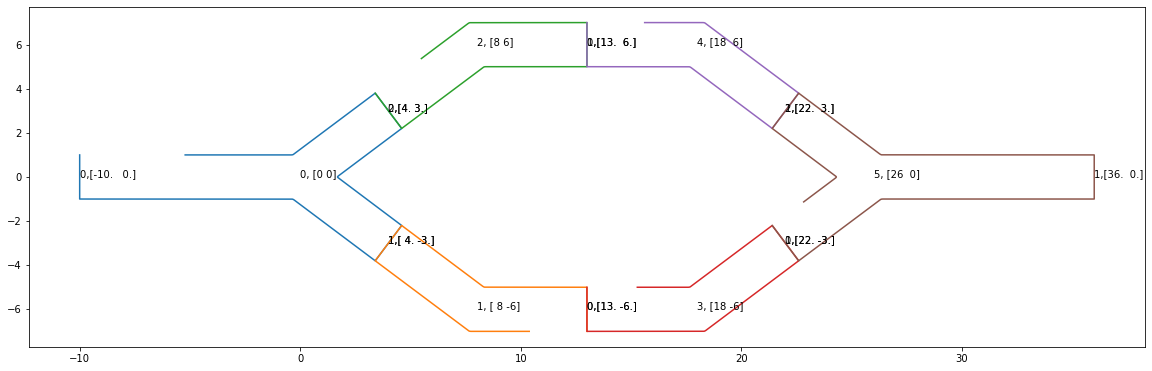

In [3]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a, i,j in zip(range(10), pipes,shifts):
    ax.plot(*(i.boundary + j).T)
    for k,let in enumerate(i.lets):
        ax.text(*(i.curves[let].matching_pt + j),f'{k},{i.curves[let].matching_pt + j}')
    ax.text(*j,f'{a}, {j}')

In [4]:
pipeGraphs = [PipeGraphComponent(p,shifts[i][0],shifts[i][1]) for i,p in enumerate(pipes)]

In [17]:
BoundaryLets = [
    BoundaryLet(pt(-10,0),0,2,1),
    BoundaryLet(pt(36,0),np.pi,2,-1)
]

In [18]:
from PipeSystem import *
pipeSys = PipeSystem(pipeGraphs,BoundaryGraphComponent(BoundaryLets))

In [21]:
pipeSys.vertices, pipeSys.edges

([<PipeSystem.Vertex at 0x13427cd30>,
 [(<PipeSystem.Vertex at 0x133a3c4f0>, <PipeSystem.Vertex at 0x133e43430>),
  (<PipeSystem.Vertex at 0x133a3c4f0>, <PipeSystem.Vertex at 0x133e43e80>),
  (<PipeSystem.Vertex at 0x1342c81f0>, <PipeSystem.Vertex at 0x133e43430>),
  (<PipeSystem.Vertex at 0x133e43e80>, <PipeSystem.Vertex at 0x1342c8fa0>),
  (<PipeSystem.Vertex at 0x1342c81f0>, <PipeSystem.Vertex at 0x1342c9c90>),
  (<PipeSystem.Vertex at 0x1342c8fa0>, <PipeSystem.Vertex at 0x1342caa70>),
  (<PipeSystem.Vertex at 0x1342c9c90>, <PipeSystem.Vertex at 0x13427cd30>),
  (<PipeSystem.Vertex at 0x1342c9c90>, <PipeSystem.Vertex at 0x1342caa70>)])

In [22]:
import networkx as nx

In [23]:
G = nx.Graph()

In [24]:
G.add_nodes_from(pipeSys.vertices)

In [25]:
G.add_edges_from(pipeSys.edges)

In [34]:
cycle = nx.cycle_basis(G)[0]

In [42]:
[line in pipeSys.edges for line in zip(cycle,cycle[1:]+[cycle[0]])]

[True, True, True, False, False, True, False]

In [44]:
[line in pipeSys.edges for line in zip(cycle[1:]+[cycle[0]],cycle)]

[False, False, False, True, True, False, True]